<a href="https://colab.research.google.com/github/Rumaisa1054/Data_Science/blob/main/stats_visuals/stats/statistical_analysis_ttest_levene_barletts_kolmonogorov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Key Point

Stricter test / higher confidence → wider interval

Less strict / lower confidence → narrower interval

Wider CI = more certainty, but less precision
Narrow CI = more precision, but less certainty

| Term                             | Meaning in context of CI                                                              | Example                                                                                     |
| -------------------------------- | ------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| **Certainty (Confidence Level)** | How confident you are that the **true population parameter** lies inside the interval | 95% CI → “If we repeated the study many times, 95% of intervals will contain the true mean” |
| **Precision (Interval Width)**   | How **narrow or tight** the CI is around the sample estimate                          | Narrow CI = tight estimate of mean, Wide CI = less exact estimate                           |


# **chi-squared tests**

In [8]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
df = sns.load_dataset('titanic')

# **categorical variables  - comparison - only categorical**

No need to check normality - its not numerical

#  **H0 : there is no significant association between gender and survival**
# **H1 : there is association**

In [12]:
# contigency table
cross_tab = pd.crosstab(df['sex'],df['survived'])

In [13]:
cross_tab

survived,0,1
sex,,
female,81,233
male,468,109


In [15]:
chi2,p,dof,expected = stats.chi2_contingency(cross_tab)
print("chi_squared statistic : ", chi2)
print('p_value',p)
print("degree of freedom : ", dof)
print("Expected : \n", expected)

chi_squared statistic :  260.71702016732104
p_value 1.1973570627755645e-58
degree of freedom :  1
Expected : 
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


### **IF the p_value is > 0.05, we fail to reject the null-hypothesis but since p_value is far less than it i.e 1.1973570627755645 × 10 power -58, we  reject the null-hypothesis and our Alternate hypothesis is true**

# **we should check normality first**

## **Shapiro wilk test**
h0 : data is normal distributed

h1: data is not normal distributed

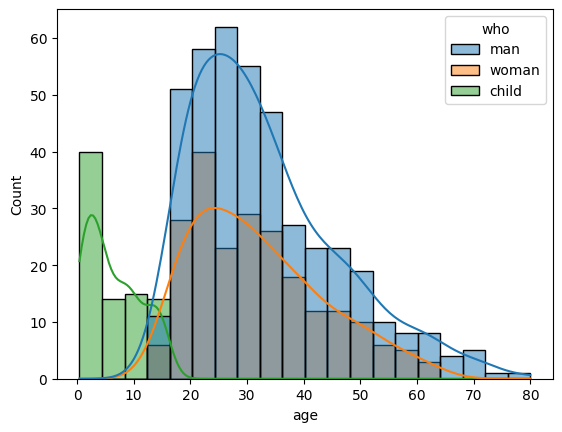

Shapiro statistic 0.9814577414504954
P_value 7.337348958673594e-08
age is not normal distributed


In [28]:
without_nulls = df['age'].dropna()
sns.histplot(df,x='age',hue = 'who',kde = True) # looks like normal - lets go for shapiro
plt.show()
z = stats.shapiro(without_nulls)

print("Shapiro statistic",z.statistic)
print("P_value",z.pvalue)

if z.pvalue > 0.05:
  print("age is normal distributed - fail to reject null-hypothesis")
else:
  print('age is not normal distributed')

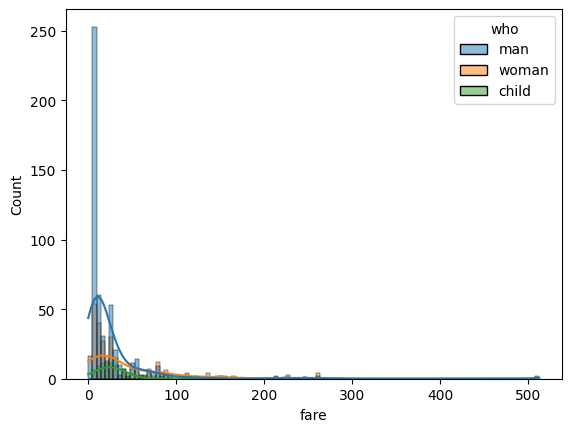

Shapiro statistic 0.5218913010396559
P_value 1.0840444395829658e-43
fare is not normal distributed


In [29]:
without_nulls = df['fare'].dropna()
sns.histplot(df,x='fare',hue = 'who',kde = True)
plt.show()
z = stats.shapiro(without_nulls)

print("Shapiro statistic",z.statistic)
print("P_value",z.pvalue)

if z.pvalue > 0.05:
  print("fare is normal distributed (fail to reject null-hypothesis)")
else:
  print('fare is not normal distributed')

# **Kolmogorov-Smirnov (K-S) test**

| Hypothesis | Statement                                                   |
| ---------- | ----------------------------------------------------------- |
| **H₀**     | The data follows the specified distribution (e.g., normal). |
| **H₁**     | The data does **not** follow the specified distribution.    |


In [34]:
# One-sample K-S test against standard normal
st , p= stats.kstest(without_nulls, 'norm')
print("statistic",st)
print("p_value",p)
if p > 0.05:
  print("age is normal distributed - fail to reject null-hypothesis")
else:
  print('age is not normal distributed')

statistic 0.9831349436254704
p_value 0.0
age is not normal distributed


# **T-test - sample size < 30 else apply z-test if sample size > 30**

## **ONE - sampled t-test (comparing against a known value**

In [38]:
sample = [1,2,3,4,5]

# population mean
mu1 = 3
mu2 = 7

# Null hypothesis - there is no difference between the sample mean and population mean
# alternate hypothesis - there is significant different


# perform one-sample t-test with mu1
st,p = stats.ttest_1samp(sample,mu1)
print("statistic",st)
print("p_value",p)
if p >0.05:
  print(f"No difference - fail to reject null-hypothesis with pop-mean : mu = {mu1}")
else:
  print(f" there is significant difference -reject null-hypothesis - with pop-mean : mu = {mu1}")

print("-" * 32)
# perform one-sample t-test with mu2
st,p = stats.ttest_1samp(sample,mu2)
print("statistic",st)
print("p_value",p)
if p >0.05:
  print(f"No difference in mean of sample and pop - fail to reject null-hypothesis with pop-mean : mu = {mu2}")
else:
  print(f" there is significant difference  in mean of sample and pop -reject null-hypothesis - with pop-mean :mu = {mu2}")

statistic 0.0
p_value 1.0
No difference - fail to reject null-hypothesis with pop-mean : mu = 3
--------------------------------
statistic -5.65685424949238
p_value 0.004812678330044227
 there is significant difference -reject null-hypothesis - with pop-mean :mu = 7


## **two - sampled t-test (comparing two groups - independent sample t-test - unpaired)**

In [40]:
sample1 = [1.2,2.2,3.2,4.2]
sample2 =[1.3,2.3,4.5,3.2]

st,p = stats.ttest_ind(sample1,sample2)
print("statistic",st)
print("p_value",p)
if p >0.05:
  print(f"No difference in mean of these 2 samples- fail to reject null-hypothesis")
else:
  print(f" there is significant difference in mean of these 2 sample-reject null-hypothesis")

statistic -0.1333293828916237
p_value 0.8982923215518296
No difference - fail to reject null-hypothesis


## **paired t-test (repititive studies - before after)**

In [42]:
before = [1.2,2.2,3.2,4.2]
after =[3.3,5.3,7.5,7.2]

st,p = stats.ttest_rel(before,after)
print("statistic",st)
print("p_value",p)
if p >0.05:
  print(f"No difference in mean before and mean after- fail to reject null-hypothesis")
else:
  print(f" there is significant difference in before mean and after mean -reject null-hypothesis")

statistic -6.919572985106857
p_value 0.006187376745962688
 there is significant difference in before mean and after mean -reject null-hypothesis


## **You can use equal_var = True / False in ttest calculation function but you need to apply levene test to understand homogenity i.e if the variance accross groups is same or not**

# **Test for homogeniety**

# **1. Levene test**

h0: variances are equal

h1 : variances are not equal

In [44]:
group1 = [1.2,2.2,3.2,4.2]
group2 =[3.3,5.3,7.5,7.2]


st,p = stats.levene(group1,group2)
print("statistic",st)
print("p_value",p)
if p >0.05:
  print(f"No difference in variances of group1 and group2 - fail to reject null-hypothesis")
else:
  print(f" there is significant difference in variances of group1 and group2 -reject null-hypothesis")

statistic 0.8779031187790316
p_value 0.38494070940391073
No difference in variances of group1 and group2 - fail to reject null-hypothesis


# **2. bartletts test**

h0: variances are equal

h1 : variances are not equal

In [45]:
group1 = [1.2,2.2,3.2,4.2]
group2 =[3.3,5.3,7.5,7.2]


st,p = stats.bartlett(group1,group2)
print("statistic",st)
print("p_value",p)
if p >0.05:
  print(f"No difference in variances of group1 and group2 - fail to reject null-hypothesis")
else:
  print(f" there is significant difference in variances of group1 and group2 -reject null-hypothesis")

statistic 0.42022345372486236
p_value 0.5168255662654287
No difference in variances of group1 and group2 - fail to reject null-hypothesis
